In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
data = pd.read_csv('Summer_olympic_Medals.xls')
data.head()


,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1896,Greece,Athens,Great Britain,GBR,2,3,2
1,1896,Greece,Athens,Hungary,HUN,2,1,3
2,1896,Greece,Athens,France,FRA,5,4,2
3,1896,Greece,Athens,United States,USA,11,7,2
4,1896,Greece,Athens,Germany,GER,6,5,2


In [7]:
just_medals = data[['Year', 'Country_Name', 'Gold', 'Silver', 'Bronze']]
just_medals.dtypes


just_medals['Total'] = just_medals[['Gold', 'Silver', 'Bronze']].sum(axis=1)
just_medals.head()



/var/folders/y9/yjkwjxy552l0r3g66ghndhyh0000gn/T/ipykernel_10525/3780141820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_medals['Total'] = just_medals[['Gold', 'Silver', 'Bronze']].sum(axis=1)


,Year,Country_Name,Gold,Silver,Bronze,Total
0,1896,Great Britain,2,3,2,7
1,1896,Hungary,2,1,3,6
2,1896,France,5,4,2,11
3,1896,United States,11,7,2,20
4,1896,Germany,6,5,2,13


In [8]:
just_medals_all = just_medals.sort_values(by='Total', ascending=False)
just_medals_all.head(10)

,Year,Country_Name,Gold,Silver,Bronze,Total
35,1904,United States,76,78,77,231
567,1980,Soviet Union,80,69,46,195
598,1984,United States,83,61,30,174
51,1908,Great Britain,56,51,39,146
658,1988,Soviet Union,55,31,46,132
566,1980,East Germany,47,37,42,126
527,1976,Soviet Union,49,41,35,125
1192,2016,United States,46,37,38,121
1280,2020,United States,39,41,33,113
716,1992,Unified Team,45,38,29,112


In [9]:
# Group by 'Year' and 'Country_Name', then sum the numeric columns
just_medals_com = just_medals_all.groupby(['Year', 'Country_Name']).sum()

# Sort within each year by 'Total' column in descending order
just_medals_com = just_medals_com.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(by='Total', ascending=False))

# Display the result
just_medals_com

export_csv = just_medals_com.to_csv (r'just_medals_com.csv')

In [24]:
just_medals_com 

Gold  Silver  Bronze  Total
Year Country_Name                              
1896 Greece           10      18      19     47
     United States    11       7       2     20
     Germany           6       5       2     13
     France            5       4       2     11
     Great Britain     2       3       2      7
...                  ...     ...     ...    ...
2020 Namibia           0       1       0      1
     Kuwait            0       0       1      1
     Puerto Rico       1       0       0      1
     Ivory Coast       0       0       1      1
     Lithuania         0       1       0      1

[1344 rows x 4 columns]

In [10]:
just_medals_quant = just_medals_all.groupby(['Year', 'Country_Name']).sort_values(by='Total', ascending=False)
just_medals_quant

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [11]:
import altair as alt

In [12]:
df = just_medals_all.copy()

# Line chart for total medals by year
line_chart = alt.Chart(df).mark_line(point=True).encode(
    x='Year:O',
    y='Total:Q',
    color='Country_Name:N',
    tooltip=['Year', 'Country_Name', 'Gold', 'Silver', 'Bronze', 'Total']
).properties(
    title='Total Medals by Country and Year'
)

# Display the chart
line_chart.display()

alt.Chart(...)

In [15]:
!pip install nbformat --upgrade

  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires nbformat==5.9.2, but you have nbformat 5.10.4 which is incompatible.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

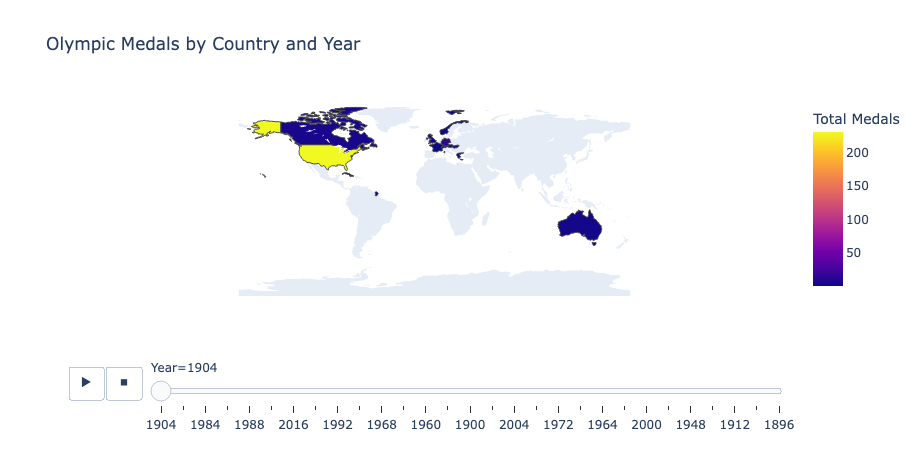

In [21]:
import plotly as py
import plotly.express as px
import plotly.io as pio

# Rename countries for compatibility with plotly maps
# For example, 'United States' to 'United States of America'
country_replacements = {
    'United States': 'United States of America',
    'Soviet Union': 'Russia',
    'Great Britain': 'United Kingdom',
    'East Germany': 'Germany',
    'Unified Team': 'Russia',
    # Add more replacements as needed
}
df['Country_Name'] = df['Country_Name'].replace(country_replacements)

# Create the choropleth map
fig = px.choropleth(
    df, 
    locations="Country_Name", 
    locationmode='country names',
    color="Total", 
    hover_name="Country_Name",
    animation_frame="Year",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Olympic Medals by Country and Year"
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="Total Medals"
    )
)

#fig.show()


In [23]:
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
just_medals_quant = just_medals.groupby(['Year', 'Country_Name']).sum()
just_medals_quant
just_medals_quant_ordered = just_medals_quant.sort_values(by='Total', ascending=False)
just_medals_quant_ordered.head(10)

,,Gold,Silver,Bronze,Total
Year,Country_Name,,,,
1904,United States,76,78,77,231
1980,Soviet Union,80,69,46,195
1984,United States,83,61,30,174
1908,Great Britain,56,51,39,146
1988,Soviet Union,55,31,46,132
1980,East Germany,47,37,42,126
1976,Soviet Union,49,41,35,125
2016,United States,46,37,38,121
2020,United States,39,41,33,113


In [ ]:
just_host = data[['Year','Host_city', 'Host_country']]
just_host = just_host.drop_duplicates()

just_host.head()
just_host.value_counts()

just_hosted_country = just_host[['Host_country', 'Host_city']].value_counts()
just_hosted_country

Host_country      Host_city          
Great Britain     London                 3
United States     Los Angeles            2
France            Paris                  2
Greece            Athens                 2
Japan             Tokyo                  2
Australia         Sydney                 1
Netherlands       Amsterdam              1
United States     St. Louis              1
                  Atlanta                1
Sweden            Stockholm              1
Spain             Barcelona              1
Soviet Union      Moscow                 1
South Korea       Seoul                  1
Italy             Rome                   1
Mexico            Mexico City            1
Australia/Sweden  Melbourne/Stockholm    1
Germany           Berlin                 1
Finland           Helsinki               1
China             Beijing                1
Canada            Montreal               1
Brazil            Rio de Janeiro         1
Belgium           Antwerp                1
West Germany    

In [ ]:
#data manipulation
number_of_medals = data['Country_Name'].value_counts()
number_of_medals

Country_Name
Great Britain            29
France                   29
United States            28
Switzerland              28
Denmark                  28
                         ..
Sri Lanka                 1
Macedonia                 1
Serbia and Montenegro     1
Paraguay                  1
Burkina Faso              1
Name: count, Length: 157, dtype: int64